# Learning Rate schedules in Practice

This is a notebook for the medium article [Learning Rate schedule in Practice](https://medium.com/@bindiatwork/learning-rate-schedule-in-practice-an-example-with-keras-and-tensorflow-2-0-2f48b2888a0c)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Fashion MMIST dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
!ls

sample_data


In [4]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
# For faster training, let's use a subset 10,000
X_train, y_train = X_train_full[:10000] / 255.0, y_train_full[:10000]

## Building a NN model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    return model

In [9]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Helper functions for plotting

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [11]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

## 1. Constant Learning Rate

In [12]:
# Create a new model
model = create_model()

In [13]:
# Learning rate defaults to 0.01 according to https://keras.io/api/optimizers/sgd/
# To use a custom Learning Rate
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=sgd,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_constant = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64
)

Epoch 1/100
125/125 [==============================] - 2s 7ms/step - loss: 1.5769 - accuracy: 0.5420 - val_loss: 1.1533 - val_accuracy: 0.6525
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 0.9746 - accuracy: 0.6977 - val_loss: 0.8810 - val_accuracy: 0.7100
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 0.8035 - accuracy: 0.7402 - val_loss: 0.7863 - val_accuracy: 0.7315
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7173 - accuracy: 0.7660 - val_loss: 0.7139 - val_accuracy: 0.7535
Epoch 5/100
125/125 [==============================] - 1s 8ms/step - loss: 0.6590 - accuracy: 0.7874 - val_loss: 0.6611 - val_accuracy: 0.7760
Epoch 6/100
125/125 [==============================] - 1s 8ms/step - loss: 0.6193 - accuracy: 0.8014 - val_loss: 0.6275 - val_accuracy: 0.7905
Epoch 7/100
125/125 [==============================] - 1s 8ms/step - loss: 0.5896 - accuracy: 0.8099 - val_loss: 0.6056 - val_accuracy: 0.7965

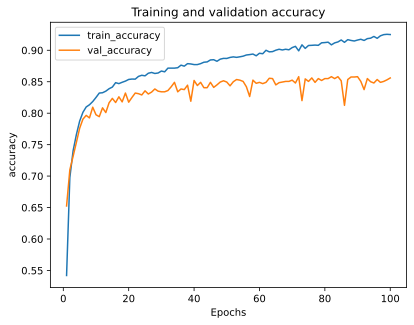

In [14]:
plot_metric(history_constant, 'accuracy')

## 2. Time-Based Decay

In [15]:
# Create a new model
model = create_model()

model.compile(
    optimizer='sgd', # Learning rate defaults to 0.01
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the learning rate schedule function
initial_learning_rate = 0.01
epochs = 100
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

history_time_based_decay = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1)],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/100
125/125 [==============================] - 1s 7ms/step - loss: 1.5881 - accuracy: 0.5364 - val_loss: 1.1556 - val_accuracy: 0.6605 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009998999876494932.
Epoch 2/100
125/125 [==============================] - 1s 6ms/step - loss: 0.9756 - accuracy: 0.6909 - val_loss: 0.8877 - val_accuracy: 0.6905 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009997000136010244.
Epoch 3/100
125/125 [==============================] - 1s 6ms/step - loss: 0.8027 - accuracy: 0.7376 - val_loss: 0.7813 - val_accuracy: 0.7520 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009994001785933966.
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7206 - accuracy: 0.7580 - val_loss: 0.7154 - val_accuracy: 0.7655 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.0

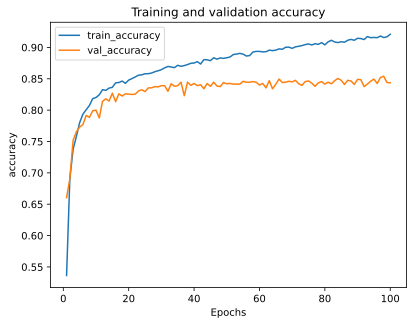

In [17]:
plot_metric(history_time_based_decay, 'accuracy')

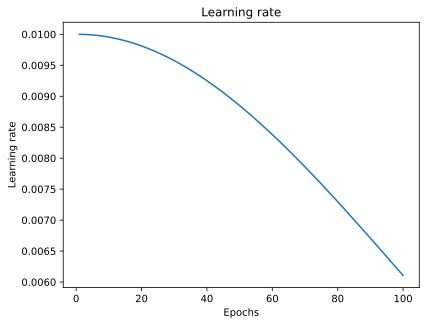

In [18]:
plot_lr(history_time_based_decay)

## 3. Step decay

In [19]:
# Create a new model
model = create_model()

model.compile(
    optimizer='sgd', # Learning rate defaults to 0.01
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Define the learning rate schedule function
initial_learning_rate = 0.01

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

# Fit the model to the training data
history_step_decay = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_step_decay, verbose=1)],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
125/125 [==============================] - 1s 6ms/step - loss: 1.5456 - accuracy: 0.5605 - val_loss: 1.1225 - val_accuracy: 0.6515 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 0.9561 - accuracy: 0.6890 - val_loss: 0.8779 - val_accuracy: 0.7075 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7970 - accuracy: 0.7395 - val_loss: 0.7685 - val_accuracy: 0.7410 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7149 - accuracy: 0.7654 - val_loss: 0.7151 - val_accuracy: 0.7600 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/100
125/125 [==============================] - 1s 5ms

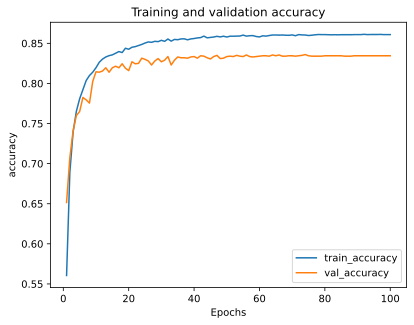

In [21]:
plot_metric(history_step_decay, 'accuracy')

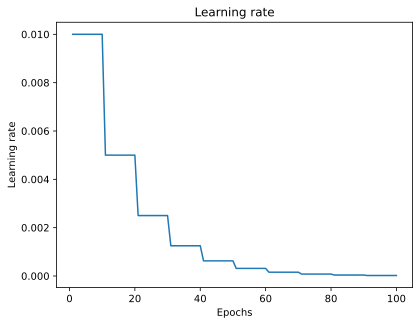

In [22]:
plot_lr(history_step_decay)

## 4. Exponential Decay

In [23]:
# Create a new model
model = create_model()

model.compile(
    optimizer='sgd', # Learning rate defaults to 0.01
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
initial_learning_rate = 0.01

def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Fit the model to the training data
history_exp_decay = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
)


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
125/125 [==============================] - 1s 6ms/step - loss: 1.5737 - accuracy: 0.5625 - val_loss: 1.1189 - val_accuracy: 0.6740 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009048374180359595.
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 0.9567 - accuracy: 0.6899 - val_loss: 0.8827 - val_accuracy: 0.6935 - lr: 0.0090

Epoch 3: LearningRateScheduler setting learning rate to 0.008187307530779819.
Epoch 3/100
125/125 [==============================] - 1s 5ms/step - loss: 0.8077 - accuracy: 0.7249 - val_loss: 0.8054 - val_accuracy: 0.7090 - lr: 0.0082

Epoch 4: LearningRateScheduler setting learning rate to 0.007408182206817179.
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.7395 - accuracy: 0.7514 - val_loss: 0.7354 - val_accuracy: 0.7590 - lr: 0.0074

Epoch 5: LearningRateScheduler setting learning rate to 0.00670320046035639

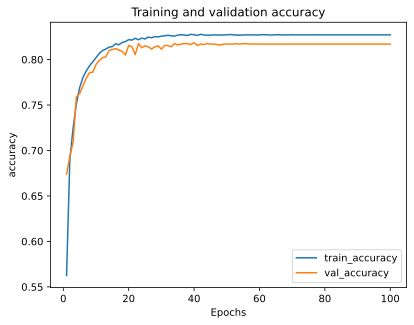

In [25]:
plot_metric(history_exp_decay, 'accuracy')

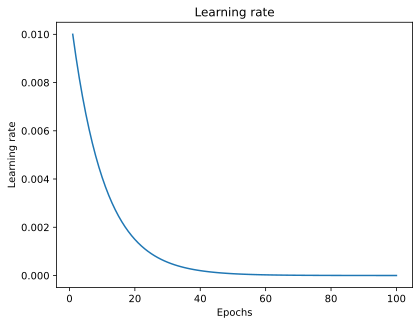

In [26]:
plot_lr(history_exp_decay)

## Compare model accuracy

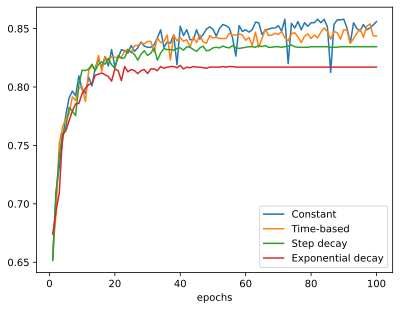

In [27]:
epochs = range(1, 101)
plt.plot(epochs,history_constant.history['val_accuracy'],label='Constant')
plt.plot(epochs,history_time_based_decay.history['val_accuracy'],label='Time-based')
plt.plot(epochs,history_step_decay.history['val_accuracy'],label='Step decay')
plt.plot(epochs,history_exp_decay.history['val_accuracy'],label='Exponential decay')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.show()

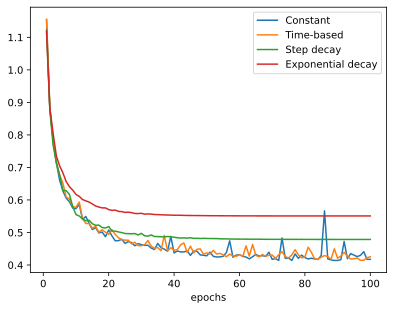

In [28]:
epochs = range(1, 101)
plt.plot(epochs,history_constant.history['val_loss'],label='Constant')
plt.plot(epochs,history_time_based_decay.history['val_loss'],label='Time-based')
plt.plot(epochs,history_step_decay.history['val_loss'],label='Step decay')
plt.plot(epochs,history_exp_decay.history['val_loss'],label='Exponential decay')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.show()

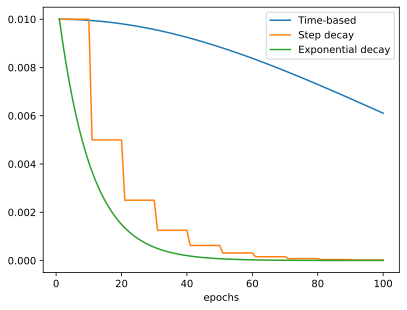

In [37]:
epochs = range(1, 101)
#plt.plot(epochs,history_constant.history["lr"],label='Constant')
plt.plot(epochs,history_time_based_decay.history["lr"],label='Time-based')
plt.plot(epochs,history_step_decay.history["lr"],label='Step decay')
plt.plot(epochs,history_exp_decay.history["lr"],label='Exponential decay')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.show()